# Predicting Loan Repayments using machine learning techniques

In [1]:
# import relevant packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('myLoans.csv', index_col=0)

In [3]:
data.head()

,inc,attained age,borrowed,redundant_feature,Target Class
clientid,,,,,
1,66155.92510,59.017015,8106.532131,0.122537,0
2,34415.15397,48.117153,6564.745018,0.190752,0
3,57317.17006,63.108049,8020.953296,0.139940,0
4,42709.53420,45.751972,6103.642260,0.142911,0
5,66952.68885,18.584336,8770.099235,0.130990,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inc                2000 non-null   float64
 1   attained age       2000 non-null   float64
 2   borrowed           2000 non-null   float64
 3   redundant_feature  2000 non-null   float64
 4   Target Class       2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.8 KB


In [5]:
# Standardize features for uniformity purposes

from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(data.drop('Target Class', axis = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(data.drop('Target Class', axis = 1))

In [9]:
scaled_features

array([[ 1.45393393,  1.36433286,  1.20281942,  0.41894954],
       [-0.76217555,  0.54226845,  0.69642695,  1.60311545],
       [ 0.83682073,  1.67287749,  1.17471147,  0.72105536],
       ...,
       [-0.07122592, -0.97366665,  0.35420081,  0.45538524],
       [-0.11000289,  1.73802098, -0.92675625, -1.06442672],
       [ 1.682986  ,  1.1483008 ,  0.96381038,  0.1365212 ]])

In [10]:
df_features = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [11]:
df_features.head()

,inc,attained age,borrowed,redundant_feature
0,1.453934,1.364333,1.202819,0.418950
1,-0.762176,0.542268,0.696427,1.603115
2,0.836821,1.672877,1.174711,0.721055
3,-0.183070,0.363887,0.544980,0.772625
4,1.509563,-1.685088,1.420765,0.565684


In [12]:
# Partition data into training and testing buckets

from sklearn.model_selection import train_test_split

In [13]:
X = df_features
y = data['Target Class']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)

## Using K Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[493  10]
 [  9  88]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       503
           1       0.90      0.91      0.90        97

    accuracy                           0.97       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.97      0.97      0.97       600



## Using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
predictions = model.predict(X_test)

In [24]:
result = classification_report(y_test, predictions)

In [25]:
print(result)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       503
           1       0.85      0.79      0.82        97

    accuracy                           0.94       600
   macro avg       0.90      0.88      0.89       600
weighted avg       0.94      0.94      0.94       600



## Using Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()

In [27]:
model2.fit(X_train,y_train)

GradientBoostingClassifier()

In [28]:
y_pred2 = model2.predict(X_test)

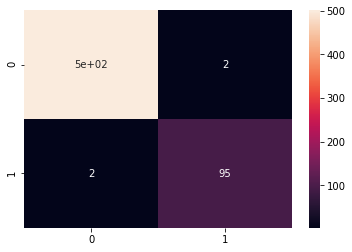

In [29]:
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)

In [30]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       0.98      0.98      0.98        97

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



### Based on results gotten from the different techniques used, we can see a significant accuracy percentage ranging between 94 - 99 percent. For this task, Gradient Boosting surpasses everyother technique with accuracy percent of 99.